In [65]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

    
with open('WEEk 27 MAY/language_activites.pkl', 'rb') as x:
    language_activities = pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_activities.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_pivot)




El diccionario language_activities ha sido cargado correctamente.


In [66]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Turn the dataframe into a numpy object
df = data_pivot.values

In [68]:
from sklearn.preprocessing import StandardScaler
# Supongamos que df es tu DataFrame o array de numpy
data = df  # Si df ya es un numpy array, no necesitas convertirlo

# Normalización de los datos usando StandardScaler
#scaler = StandardScaler()
#data = scaler.fit_transform(data)

In [69]:
data

array([[ 7077,  4235,   279, ...,  4290,  1861,  1799],
       [62614,  8196,     0, ..., 19674, 13667, 20825],
       [41399, 38672,     0, ..., 12888, 47443, 20759],
       ...,
       [14669,  7377,   706, ...,  6595,  4451,  4183],
       [ 1199,  1681,    71, ...,   591,   368,   430],
       [15933,  3873,   562, ...,  3346,  3125,  3892]])

In [7]:
df.shape

(11, 2352)

In [70]:
n_input_layer = df.shape[1]
n_hidden1 = 30
n_hidden2 = 15
n_hidden3 = 15

n_encoding_layer = 10

n_hidden5 = 15
n_hidden6 = 15
n_hidden7 = 30
n_output_layer = n_input_layer  # of course, the output layer must be of the same size of the input layer
     

In [71]:

# Placeholders are kind of "empty variables" in a TF computational graph.
# I will feed the actual data through them - in the graph, they are like entry doors for my data

#X = tf.placeholder(tf.float32, shape = [None, df.shape[1]], name='X')
X = tf.keras.layers.Input(shape=(df.shape[1],), name='X')

In [72]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
# Definición de la arquitectura del autoencoder
input_layer = Input(shape=(n_input_layer,), name="input_layer")
hidden1 = Dense(n_hidden1, activation=tf.nn.leaky_relu, name="hidden_layer1")(input_layer)
hidden2 = Dense(n_hidden2, activation=tf.nn.leaky_relu, name="hidden_layer2")(hidden1)
hidden3 = Dense(n_hidden3, activation=tf.nn.leaky_relu, name="hidden_layer3")(hidden2)
encoding_layer = Dense(n_encoding_layer, activation=tf.nn.leaky_relu, name="encoding_layer")(hidden3)
hidden5 = Dense(n_hidden5, activation=tf.nn.leaky_relu, name="hidden_layer5")(encoding_layer)
hidden6 = Dense(n_hidden6, activation=tf.nn.leaky_relu, name="hidden_layer6")(hidden5)
hidden7 = Dense(n_hidden7, activation=tf.nn.leaky_relu, name="hidden_layer7")(hidden6)
output_layer = Dense(n_output_layer, activation=tf.nn.leaky_relu, name="output_layer")(hidden7)

In [73]:
# set number of epochs
n_epochs = 5000

# set learning rate
learning_rate = 0.001

In [74]:
# implement Mean Squared Error
loss = tf.reduce_mean(tf.square(X - output_layer))

In [75]:
from tensorflow.keras.models import Model
# Define the TensorFlow operation that trains the model
#training_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)
# Construcción del modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Definir el optimizador y compilar el modelo
autoencoder.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate), loss='mean_squared_error')

In [76]:
# Guardar solo los pesos del modelo
autoencoder.save_weights('Encoder.h5')

In [77]:
print(autoencoder.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2352)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 30)                70590     
                                                                 
 hidden_layer2 (Dense)       (None, 15)                465       
                                                                 
 hidden_layer3 (Dense)       (None, 15)                240       
                                                                 
 encoding_layer (Dense)      (None, 10)                160       
                                                                 
 hidden_layer5 (Dense)       (None, 15)                165       
                                                                 
 hidden_layer6 (Dense)       (None, 15)                240 

In [78]:
data

array([[ 7077,  4235,   279, ...,  4290,  1861,  1799],
       [62614,  8196,     0, ..., 19674, 13667, 20825],
       [41399, 38672,     0, ..., 12888, 47443, 20759],
       ...,
       [14669,  7377,   706, ...,  6595,  4451,  4183],
       [ 1199,  1681,    71, ...,   591,   368,   430],
       [15933,  3873,   562, ...,  3346,  3125,  3892]])

In [79]:
# Callback para monitorear la pérdida
class LossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        # if epoch % 100 == 0:
        #     print(f"{epoch+1}. Loss: {logs.get('loss')},")

loss_history = LossHistory()

# Entrenamiento del modelo con el callback
history=autoencoder.fit(data, data, epochs=n_epochs, batch_size=256, shuffle=True, callbacks=[loss_history])

# Guardar el modelo completo
autoencoder.save('autoencoder_model_nostandarizada.h5')

# Extracción de la parte del encoder para la reducción de dimensionalidad
encoder = Model(inputs=input_layer, outputs=encoding_layer)

# Transformación de los datos
encoded_data = encoder.predict(data)


print("Encoding complete.")

Epoch 1/5000
1/1 [==============================] - 0s 185ms/step - loss: 360326496.0000
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 343604128.0000
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 324563616.0000
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 303930912.0000
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 282787744.0000
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 263685776.0000
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 248083696.0000
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 233475168.0000
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 215004624.0000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 193294144.0000
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 171245072.0000
Epoch 12/5000
1/1 [====================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 1401/5000
1/1 [==============================] - 0s 2ms/step - loss: 208220.4375
Epoch 1402/5000
1/1 [==============================] - 0s 2ms/step - loss: 209242.0938
Epoch 1403/5000
1/1 [==============================] - 0s 2ms/step - loss: 215927.8594
Epoch 1404/5000
1/1 [==============================] - 0s 2ms/step - loss: 219635.5469
Epoch 1405/5000
1/1 [==============================] - 0s 2ms/step - loss: 218199.2031
Epoch 1406/5000
1/1 [==============================] - 0s 2ms/step - loss: 215928.2500
Epoch 1407/5000
1/1 [==============================] - 0s 2ms/step - loss: 211615.1094
Epoch 1408/5000
1/1 [==============================] - 0s 2ms/step - loss: 208657.6406
Epoch 1409/5000
1/1 [==============================] - 0s 2ms/step - loss: 204348.7969
Epoch 1410/5000
1/1 [==============================] - 0s 2ms/step - loss: 204007.6875
Epoch 1411/5000
1/1 [==============================] - 0s 2ms/step - loss: 208364.8125
Epoch 1412/5000
1/1 [======================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 31754.2695
Epoch 2803/5000
1/1 [==============================] - 0s 2ms/step - loss: 31760.0703
Epoch 2804/5000
1/1 [==============================] - 0s 2ms/step - loss: 32139.1543
Epoch 2805/5000
1/1 [==============================] - 0s 2ms/step - loss: 31891.9668
Epoch 2806/5000
1/1 [==============================] - 0s 2ms/step - loss: 32251.7793
Epoch 2807/5000
1/1 [==============================] - 0s 2ms/step - loss: 32057.8633
Epoch 2808/5000
1/1 [==============================] - 0s 2ms/step - loss: 32199.8828
Epoch 2809/5000
1/1 [==============================] - 0s 2ms/step - loss: 32367.4297
Epoch 2810/5000
1/1 [==============================] - 0s 2ms/step - loss: 32146.7734
Epoch 2811/5000
1/1 [==============================] - 0s 2ms/step - loss: 32076.0078
Epoch 2812/5000
1/1 [==============================] - 0s 2ms/step - loss: 32116.2832
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - l

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 32580.7324
Epoch 4272/5000
1/1 [==============================] - 0s 2ms/step - loss: 30019.7188
Epoch 4273/5000
1/1 [==============================] - 0s 2ms/step - loss: 27584.2324
Epoch 4274/5000
1/1 [==============================] - 0s 2ms/step - loss: 25917.7012
Epoch 4275/5000
1/1 [==============================] - 0s 2ms/step - loss: 24553.8066
Epoch 4276/5000
1/1 [==============================] - 0s 2ms/step - loss: 24297.0137
Epoch 4277/5000
1/1 [==============================] - 0s 3ms/step - loss: 25004.3672
Epoch 4278/5000
1/1 [==============================] - 0s 2ms/step - loss: 26183.6270
Epoch 4279/5000
1/1 [==============================] - 0s 2ms/step - loss: 27977.1699
Epoch 4280/5000
1/1 [==============================] - 0s 2ms/step - loss: 29711.0918
Epoch 4281/5000
1/1 [==============================] - 0s 2ms/step - loss: 31423.6172
Epoch 4282/5000
1/1 [==============================] - 0s 2ms/step - l

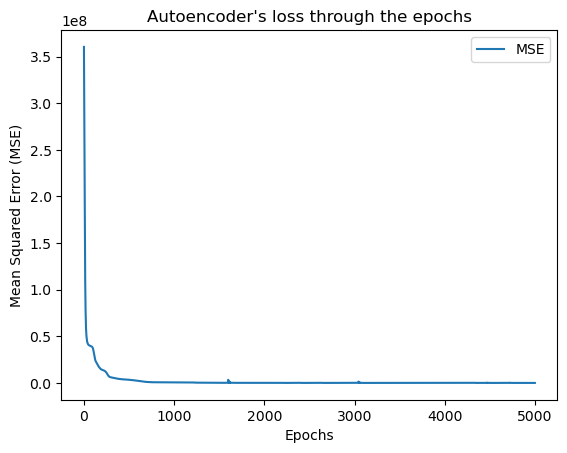

In [80]:
# Graficar la pérdida a lo largo de las épocas
plt.plot(loss_history.losses, label="MSE")
plt.title("Autoencoder's loss through the epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()

In [81]:
# You can save it in a pandas dataframe
encoded_pandas_dataframe = pd.DataFrame(encoded_data)

# Let's take a look:
encoded_pandas_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000
mean,-94420.023438,-94441.578125,-37603.296875,-21384.822266,332505.062500,2.375665e+05,5.469768e+05,2.598140e+05,239958.593750,-44559.472656
std,57867.914062,65365.015625,29749.720703,32132.718750,300410.968750,3.558737e+05,3.999894e+05,3.674164e+05,205926.796875,33428.976562
min,-177835.734375,-199414.921875,-105338.328125,-84019.835938,11950.832031,-8.854270e+04,7.200825e+04,-2.258764e+04,-693.836670,-118158.960938
25%,-144126.414062,-135988.210938,-48640.681641,-36140.676758,157355.140625,3.526530e+03,2.533838e+05,4.145406e+04,88355.000000,-57620.007812
50%,-85029.742188,-101813.484375,-39194.105469,-13869.458008,210444.015625,1.202136e+05,3.716465e+05,1.015625e+05,252138.500000,-49029.582031
75%,-45278.949219,-35462.919922,-13970.914062,1239.815430,488120.296875,2.855966e+05,7.473682e+05,3.641056e+05,309816.578125,-18537.202637
max,-12862.946289,-8822.973633,-5357.565918,12092.371094,952989.250000,1.013173e+06,1.287706e+06,1.154944e+06,685354.875000,-5359.058105


In [82]:
encoded_pandas_dataframe

,0,1,2,3,4,5,6,7,8,9
0,-26276.916016,-38189.652344,-10506.861328,12092.371094,144262.250000,-1.585676e+03,1.674903e+05,8.002124e+04,76556.101562,-12801.530273
1,-177835.734375,-109297.976562,-65357.425781,-69716.437500,724168.312500,1.013173e+06,1.120868e+06,-2.258764e+04,685354.875000,-118158.960938
2,-138900.921875,-199414.921875,-50927.894531,-13869.458008,379649.156250,-8.854270e+04,7.452258e+05,1.154944e+06,100153.898438,-28985.177734
3,-155065.984375,-117707.953125,-105338.328125,-84019.835938,952989.250000,7.954854e+05,1.287706e+06,5.818055e+05,252138.500000,-49029.582031
4,-40664.074219,-32736.187500,-11832.406250,-16510.958984,11950.832031,1.336444e+05,1.575809e+05,3.644767e+04,119719.210938,-24272.875000
5,-49893.824219,-8822.973633,-39194.105469,-42759.480469,203098.828125,3.871887e+05,3.716465e+05,1.464057e+05,-693.836670,-11086.695312
6,-128779.828125,-154268.468750,-42657.167969,9663.851562,596591.437500,1.840046e+05,7.495107e+05,1.366061e+05,462928.000000,-75577.992188
7,-149351.906250,-176763.734375,-46353.468750,-29521.873047,210444.015625,-1.875567e+03,6.485405e+05,5.993910e+05,319314.062500,-64297.925781
8,-85029.742188,-101813.484375,-20001.589844,-3070.855469,170448.031250,6.288729e+04,3.568898e+05,1.015625e+05,294289.687500,-50942.089844
9,-12862.946289,-16251.064453,-5357.565918,-1826.961182,43710.679688,8.638735e+03,7.200825e+04,4.646045e+04,29465.068359,-5359.058105


In [83]:
import pandas as pd

# Supongamos que encoded_pandas_dataframe es tu DataFrame actual
encoded_pandas_dataframe = pd.DataFrame(encoded_data)

# Lista de nuevos índices de fila
new_index = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Asegúrate de que el tamaño del índice coincida con el número de filas en el DataFrame
if len(new_index) == encoded_pandas_dataframe.shape[0]:
    encoded_pandas_dataframe.index = new_index
else:
    raise ValueError("El tamaño del índice nuevo no coincide con el número de filas en el DataFrame")

# Mostrar el DataFrame con los nuevos índices
print(encoded_pandas_dataframe)

                0              1              2             3              4  \
ar  -26276.916016  -38189.652344  -10506.861328  12092.371094  144262.250000   
de -177835.734375 -109297.976562  -65357.425781 -69716.437500  724168.312500   
es -138900.921875 -199414.921875  -50927.894531 -13869.458008  379649.156250   
fr -155065.984375 -117707.953125 -105338.328125 -84019.835938  952989.250000   
hu  -40664.074219  -32736.187500  -11832.406250 -16510.958984   11950.832031   
it  -49893.824219   -8822.973633  -39194.105469 -42759.480469  203098.828125   
ja -128779.828125 -154268.468750  -42657.167969   9663.851562  596591.437500   
pt -149351.906250 -176763.734375  -46353.468750 -29521.873047  210444.015625   
ru  -85029.742188 -101813.484375  -20001.589844  -3070.855469  170448.031250   
vi  -12862.946289  -16251.064453   -5357.565918  -1826.961182   43710.679688   
zh  -73958.281250  -83590.960938  -16109.421875   4306.592285  220242.921875   

               5             6         

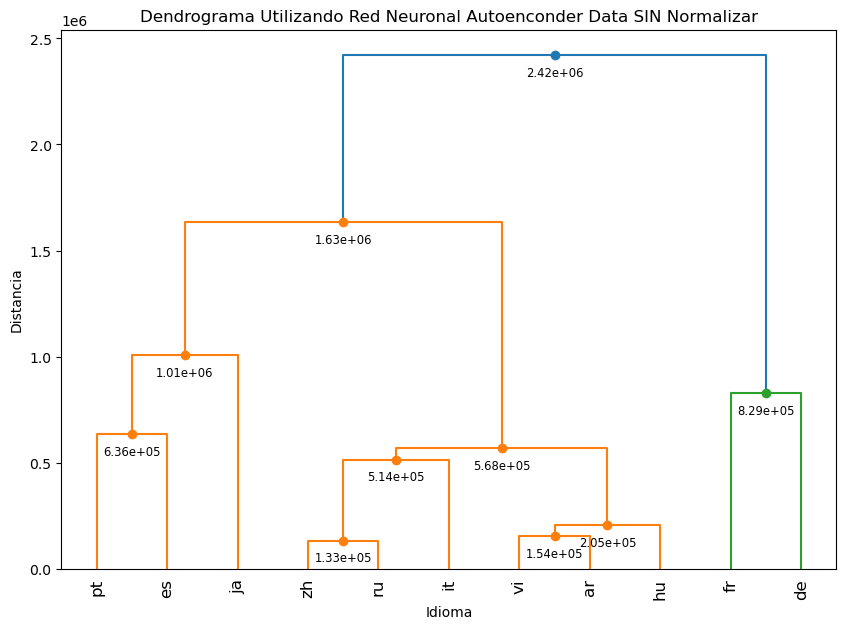

In [84]:
# Realizar la clusterización jerárquica
linked = linkage(encoded_pandas_dataframe, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = encoded_pandas_dataframe.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma Utilizando Red Neuronal Autoenconder Data SIN Normalizar')
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram8.png')
plt.show()